# Baseball Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps

# Study data files
player_path = "./player.csv"
batting_path = "./batting.csv"
pitching_path = "./pitching.csv"
fielding_path = "./fielding.csv"

# Read the baseball data and the study results
player_data = pd.read_csv(player_path)
player_data.head()

# Clean player data
player_clean = player_data[["player_id", "birth_country", "birth_state",
                          "birth_city", "name_given", "weight", "height",
                          "bats", "throws", "debut", "final_game"]]
player_clean.head()

,player_id,birth_country,birth_state,birth_city,name_given,weight,height,bats,throws,debut,final_game
0,aardsda01,USA,CO,Denver,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23
1,aaronha01,USA,AL,Mobile,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03
2,aaronto01,USA,AL,Mobile,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26
3,aasedo01,USA,CA,Orange,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03
4,abadan01,USA,FL,Palm Beach,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13


## Bar Graph of Player Birth States 

In [2]:
# # Generate a bar plot showing the total number of players born in each state(exclude non-US born athletes).
# states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
#           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "LA", "ME",
#           "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
#           "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
#           "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
# states
# us_players = player_clean["birth_state" == states].value_counts()
# # Create x-axis and tick locations
# x_axis = np.arange(len(us_players))
# tick_locations = [value+0.5 for value in x_axis]

# # Create bar chart
# plt.figure(figsize=(8,5))
# plt.bar(x_axis, us_players, color='blue', alpha=0.8, align="edge")
# plt.xticks(tick_locations, states, rotation="vertical")

# # Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(us_players)+10)

# # Create title and labels
# plt.title("Total Players Born in Each State")
# plt.xlabel("States")
# plt.ylabel("Total Players")
# plt.tight_layout()
# plt.show()


In [3]:
batting_data = pd.read_csv(batting_path)
batting_data.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
pitching_data = pd.read_csv(pitching_path)
pitching_data.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


## Total Errors by Position

Text(0, 0.5, 'Total Errors')

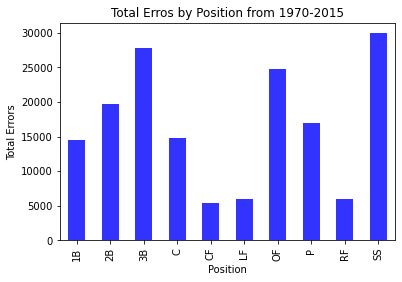

In [5]:
# Import the fielding data
fielding_data = pd.read_csv(fielding_path)
fielding_data

# Only show data from 1970 and remove position DH(hitter only)
fielding_data = fielding_data [fielding_data["year"] >= 1970]
fielding_data = fielding_data[fielding_data["pos"] != "DH"]
fielding_data

# Combine by position and find the most errors
err_data = fielding_data[fielding_data["g"] != 0]
err_data = err_data.groupby("pos").sum()["e"]
err_data.sort_values()

# Plot the data as a bar chart
err_data.plot(kind = "bar", color = "blue", alpha = 0.8, align ="center")

# Add labels
plt.title("Total Erros by Position from 1970-2015")
plt.xlabel("Position")
plt.ylabel("Total Errors")


### Observation: Shortstops and 3rd Base have the most errors and individual outfield positions(RF, LF, CF) have the least. This is expected as SS and 3rd base have more attempts at fielding than other positions.

## Do players with more years played have better fielding percentage?

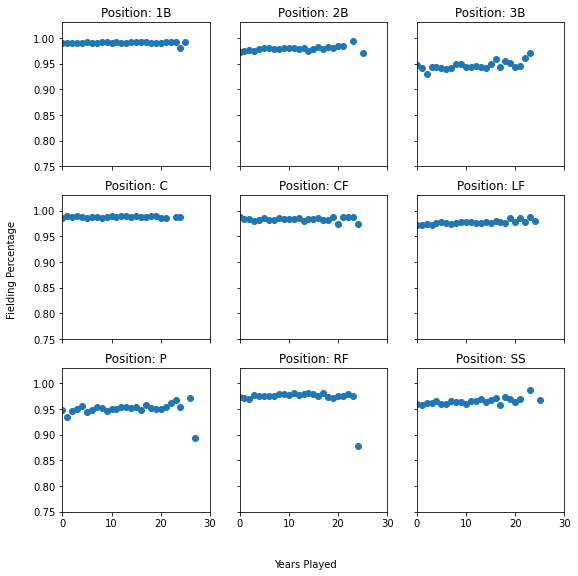

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Find the total years played
player_clean["started"] = pd.to_datetime(player_clean['debut'], format='%Y-%m-%d').dt.year
player_clean["final"] = pd.to_datetime(player_clean['final_game'], format='%Y-%m-%d').dt.year
years_played = player_clean["final"] - player_clean["started"]
player_clean["years_played"] = years_played
player_clean

# Merge the data
new_field = pd.merge(fielding_data, player_clean, on="player_id")
new_field

# Find the fielding percentage(FP = (put out + attempts)/(put outs + attempts + errors))
# Create a new column for fielding percentage
new_field["FP"] = ""
new_field
new_field["FP"] = (new_field["po"] + new_field["a"])/(new_field["po"] + new_field["a"] + new_field["e"])

# Remove players that had less than 5 games played
new_field = new_field[new_field["g"]> 5]
new_field = new_field.groupby(["pos", "years_played"]).mean()[["FP"]]
new_field = new_field.reset_index(level=['pos', 'years_played'])
positions = ['1B', '2B', '3B', 'C', 'CF', 'LF', 'P', 'RF', 'SS']
new_field

# Create a scatter plot
fig, axes = plt.subplots(nrows=3, ncols=3, sharex = True, sharey = True, figsize=(9, 9))
fig.text(0.5, 0.04, 'Years Played', ha='center')
fig.text(0.04, 0.5, 'Fielding Percentage', va='center', rotation='vertical')
axes = axes.ravel()
for i in range(9):
    data = new_field[new_field["pos"] == positions[i]]
    axes[i].scatter(data["years_played"], data["FP"])
    axes[i].set_xlim(0,30)
    axes[i].set_ylim(0.75, 1.03)
    axes[i].set_title("Position: " + positions[i])

### Observation: At this level of competition, the average fielding percentage does not vary much for amount of time spent playing professional baseball